# _Foundations of Applied Mathematics_ Labs: Volume 1

In [1]:
%matplotlib inline

# 8. Differentiation

# 9. Newton’s Method

In [42]:
F = lambda x: x / 2
x0, tol, maxiters = 10, 1e-9, 8
for k in range(maxiters):           # Iterate at most N times.
    print(x0, end='  ')
    x1 = F(x0)                      # Compute the next iteration.
    if abs(x1 - x0) < tol:          # Check for convergence.
        break                       # Upon convergence, stop iterating.
    x0 = x1                         # Otherwise, continue iterating.

10  5.0  2.5  1.25  0.625  0.3125  0.15625  0.078125  

In [44]:
import numpy as np
f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)

x_real = np.linspace(-1.5, 1.5, 500)    # Real parts.
x_imag = np.linspace(-1.5, 1.5, 500)    # Imaginary parts.
X_real, X_imag = np.meshgrid(x_real, x_imag)
X_0 = X_real + 1j*X_imag                # Combine real and imaginary parts.

In [45]:
f = lambda x: x**3 - 1
Df = lambda x: 3*x**2
X_1 = X_0 - f(X_0)/Df(X_0)

# 10. Conditioning and Stability

In [38]:
import numpy as np
from scipy import linalg as la

A = np.array([[1, 1], [1, 1+1e-10]])
np.linalg.cond(A)

39999991794.0589

In [39]:
# Set up and solve a simple system of equations.
b1 = np.array([2, 2])
x1 = la.solve(A, b1)
print(x1)

[2. 0.]


In [40]:
# Solve a system with a very slightly different vector b.
b2 = np.array([2, 2+1e-5])
la.norm(b1 - b2)
x2 = la.solve(A, b2)
print(x2) # This solution is hugely different!

[-99997.99172662  99999.99172662]


In [ ]:
w_coeffs = np.array([1, -210, 20615, -1256850, 53327946, -1672280820,
                    40171771630, -756111184500, 11310276995381,
                    -135585182899530, 1307535010540395,
                    -10142299865511450, 63030812099294896,
                    -311333643161390640, 1206647803780373360,
                    -3599979517947607200, 8037811822645051776,
                    -12870931245150988800, 13803759753640704000,
                    -8752948036761600000, 2432902008176640000])
w_roots = np.arange(1, 21)

In [ ]:
import sympy as sy
from matplotlib import pyplot as plt

# The roots of w are 1, 2, ..., 20.
w_roots = np.arange(1, 21)

# Get the exact Wilkinson polynomial coefficients using SymPy.
x, i = sy.symbols('x i')
w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
w_coeffs = np.array(w.all_coeffs())
print(w_coeffs[:6])

In [ ]:
# Perturb one of the coefficients very slightly.
h = np.zeros(21)
h[1]=1e-7
new_coeffs = w_coeffs - h
print(new_coeffs[:6])

In [ ]:
# Use NumPy to compute the roots of the perturbed polynomial.
new_roots = np.roots(np.poly1d(new_coeffs))

In [ ]:
# Sort the roots to ensure that they are in the same order.
w_roots = np.sort(w_roots)
new_roots = np.sort(new_roots)

In [ ]:
# Estimate the absolute condition number in the infinity norm.
k = la.norm(new_roots - w_roots, np.inf) / la.norm(h, np.inf)
print(k)

In [ ]:
# Estimate the relative condition number in the infinity norm.
k * la.norm(w_coeffs, np.inf) / la.norm(w_roots, np.inf) # This is huge!!

In [ ]:
reals = np.random.normal(0, 1e-10, A.shape)
imags = np.random.normal(0, 1e-10, A.shape)
H = reals + 1j*imags

# w_coeffs holds the coefficients and w_roots holds the true roots.
computed_roots = np.sort(np.roots(np.poly1d(w_coeffs)))
print(computed_roots[:6])       # The computed roots are close to integers.

In [ ]:
# Compute the forward error.
forward_error = la.norm(w_roots - computed_roots)
print(forward_error)

In [ ]:
# Compute the relative forward error.
forward_error / la.norm(w_roots) # The error is nice and small.

In [ ]:
# Use least squares to approximate sin(x) with a five-degree polynomial.
x = np.linspace(0, 6, 10)           # The x-values of the data.
b = np.sin(x) + .2*np.random.randn(10) # The y-values of the data (noisy).
A = np.vander(x, 6)                 # Set up the matrix of data values.
coeffs = la.lstsq(A, b)[0]          # Get the polynomial coefficients.

domain = np.linspace(0, 6, 100)     # Define a finer domain for plotting.
plt.plot(x, b, 'k*')				# Plot the approximated points.

In [ ]:
plt.plot(domain, np.sin(domain))

In [ ]:
# np.poly1d() converts an array of coefficients into a callable polynomial.
plt.plot(domain, np.poly1d(coeffs)(domain))

In [ ]:
xk, yk = np.load("stability_data.npy").T
A = np.vander(xk, n+1)

In [ ]:
from math import sqrt           # np.sqrt() fails for very large numbers.

a = 10**20 + 1
b = 10**20
sqrt(a) - sqrt(b)               # Do the subtraction directly.

In [ ]:
(a - b) / (sqrt(a) + sqrt(b))   # Use the alternative formulation.

# 11. Monte Carlo Integration

In [8]:
import numpy as np
from scipy import linalg as la

# Get 2000 random points in the 2-D domain [-1,1]x[-1,1].
points = np.random.uniform(-1, 1, (2,2000))

# Determine how many points are within the circle.
lengths = la.norm(points, axis=0)
num_within = np.count_nonzero(lengths < 1)

# Estimate the circle's area.
4 * (num_within / 2000)

3.136

In [9]:
for N in [5000, 7500, 10000]:
    print(np.mean(1. / np.random.uniform(0, 1, N)), end='\t')

8.827320341103658	11.252486103247822	11.4271939055696	

In [10]:
from scipy import stats

# Define the bounds of integration.
mins = np.array([-1, -1, -2])
maxs = np.array([ 1,  3,  1])

# The distribution has mean 0 and covariance I (the nxn identity).
means, cov = np.zeros(3), np.eye(3)

# Compute the integral with SciPy.
stats.mvn.mvnun(mins, maxs, means, cov)[0]

0.4694277116055261

# 12. Importance Sampling

In [1]:
from scipy import stats
import numpy as np

# Create an object for the standard normal distribution.
F = stats.norm()
# loc is the mean and scale is the standard deviation.
G = stats.norm(loc=3, scale=2)

# Calculate the probability of drawing a 1 from the normal distribution.
F.pdf(1)

0.24197072451914337

In [2]:
# Draw a number at random from the normal distribution.
F.rvs()

0.26221327268838235

In [3]:
# Specifying a size returns a numpy.ndarray.
F.rvs(size=2)

array([0.44708986, 1.20502796])

In [4]:
from matplotlib import pyplot as plt
# Create a linspace for our graph.
X = np.linspace(-4, 4, 100)
# Use the normal distribution created previously.
plt.plot(X, F.pdf(X))
plt.show()

In [5]:
# Choose the importance distribution with mean 4 and std dev 1
G = stats.norm(loc=4, scale=1)
g = G.pdf                   # Equation for importance distribution
sampler = G.rvs             # Samples from importance distribution

1 - stats.norm.cdf(3)

0.0013498980316301035

In [6]:
# Create the gamma distribution object with a = 9, theta = .5
F = stats.gamma(a=9, scale=.5)

# Create a 2-dim multivariate normal object with a zero vector mean and cov matrix I
F = stats.multivariate_normal(mean=np.zeros(2), cov=np.eye(2))
F.pdf(np.array([1,1]))

0.05854983152431917

In [7]:
F.rvs(size=3)

array([[ 0.06329161,  1.35241089],
       [-0.28890177, -0.11085229],
       [-1.39055316,  0.3168895 ]])

# 13. Visualizing Complex-valued Functions

In [33]:
import numpy as np

z = 2 - 2*1j                    # 1j is the imaginary unit i = sqrt(-1).
r, theta = np.abs(z), np.angle(z)
print(r, theta)                 # The angle is between -pi and pi.

2.8284271247461903 -0.7853981633974483


In [34]:
# Check that z = r * e^(i*theta)
np.isclose(z, r*np.exp(1j*theta))

True

In [35]:
# These function also work on entire arrays.
np.abs(np.arange(5) + 2j*np.arange(5))

array([0.        , 2.23606798, 4.47213595, 6.70820393, 8.94427191])

In [36]:
x = np.linspace(-1, 1, 400)     # Real domain.
y = np.linspace(-1, 1, 400)     # Imaginary domain.
X, Y = np.meshgrid(x, y)        # Make grid matrices.
Z = X + 1j*Y                    # Combine the grids into a complex array.

from sympy import mpmath as mp
mp.quad(lambda z: mp.exp(z), (complex(-1, -1), complex(1, 1)))

ImportError: cannot import name 'mpmath'

/Users/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide
/Users/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


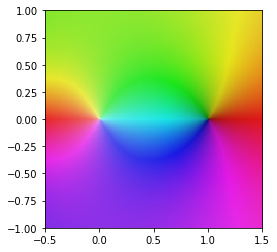

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from colorsys import hls_to_rgb

def colorize(z):
    '''
    Map a complex number to a color (or hue) and lightness.

    INPUT:
    z - an array of complex numbers in rectangular coordinates

    OUTPUT:
    If z is an n x m array, return an n x m x 3 array whose third axis encodes
    (hue, lightness, saturation) tuples for each entry in z. This new array can
    be plotted by plt.imshow().
    '''

    zy=np.flipud(z)
    r = np.abs(zy)
    arg = np.angle(zy)

    # Define hue (h), lightness (l), and saturation (s)
    # Saturation is constant in our visualizations
    h = (arg + np.pi)  / (2 * np.pi) + 0.5
    l = 1.0 - 1.0/(1.0 + r**0.3)
    s = 0.8

    # Convert the HLS values to RGB values.
    # This operation returns a tuple of shape (3,n,m).
    c = np.vectorize(hls_to_rgb) (h,l,s)

    # Convert c to an array and change the shape to (n,m,3)
    c = np.array(c)
    c = c.swapaxes(0,2)
    c = c.swapaxes(0,1)
    return c

f = lambda z :  (z**2-1)/z
x = np.linspace(-.5, 1.5, 401)
y = np.linspace(-1, 1, 401)
X,Y = np.meshgrid(x,y)
Z=f(X+Y*1j)
Zc=colorize(Z)
plt.imshow(Zc, extent=(-.5, 1.5, -1, 1))
plt.show()

# 14. The PageRank Algorithm

In [ ]:

A = np.array([[ 0,  0,  0,  0,  0,  0,  0,  1],
              [ 1,  0,  0,  0,  0,  0,  0,  0],
              [ 0,  0,  0,  0,  0,  0,  0,  0],
              [ 1,  0,  1,  0,  0,  0,  1,  0],
              [ 1,  0,  0,  0,  0,  1,  1,  0],
              [ 1,  0,  0,  0,  0,  0,  1,  0],
              [ 1,  0,  0,  0,  0,  0,  0,  0],
              [ 1,  0,  0,  0,  0,  0,  0,  0]])

def to_matrix( filename, n ):
    ''' Return the nxn adjacency matrix described by the file.

    INPUTS:
    filename - Name of a .txt file describing a directed graph. Lines
            describing edges should have the form
        '<from node>\t<to node>'.
        The file may also include comments.
    n   - The number of nodes in the graph described by datafile

    RETURN:
    Return a NumPy array.
    '''

# Open `matrix.txt' for read-only
with open('./matrix.txt', 'r') as myfile:
    for line in myfile:
        print line

line = '0\t4\n'
# strip() removes trailing whitespace from a line.
# split() returns a list of the space-separated pieces of the line.
line.strip().split()

Am = np.array([[ 0,  0,  0,  0,  0,  0,  0,  1],
               [ 1,  0,  0,  0,  0,  0,  0,  0],
               [ 1,  1,  1,  1,  1,  1,  1,  1],
               [ 1,  0,  1,  0,  0,  0,  1,  0],
               [ 1,  0,  0,  0,  0,  1,  1,  0],
               [ 1,  0,  0,  0,  0,  0,  1,  0],
               [ 1,  0,  0,  0,  0,  0,  0,  0],
               [ 1,  0,  0,  0,  0,  0,  0,  0]])

K = np.array([[ 0   ,  1   ,  1./8,  1./3,  1./3,  1./2,  1   ,  1   ],
              [ 0   ,  0   ,  1./8,  0   ,  0   ,  0   ,  0   ,  0   ],
              [ 0   ,  0   ,  1./8,  1./3,  0   ,  0   ,  0   ,  0   ],
              [ 0   ,  0   ,  1./8,  0   ,  0   ,  0   ,  0   ,  0   ],
              [ 0   ,  0   ,  1./8,  0   ,  0   ,  0   ,  0   ,  0   ],
              [ 0   ,  0   ,  1./8,  0   ,  1./3,  0   ,  0   ,  0   ],
              [ 0   ,  0   ,  1./8,  1./3,  1./3,  1./2,  0   ,  0   ],
              [ 1   ,  0   ,  1./8,  0   ,  0   ,  0   ,  0   ,  0   ]])

from scipy import linalg as la
I = np.eye(8)
d = .85
la.solve(I-d*K, ((1-d)/8)*np.ones(8))

def iter_solve( adj, N=None, d=.85, tol=1E-5):
    '''
    Return the page ranks of the network described by 'adj' using the iterative method.

    INPUTS:
    adj - A NumPy array representing the adjacency matrix of a directed
            graph
    N     - Restrict the computation to the first `N` nodes of the graph.
            Defaults to N=None; in this case, the entire matrix is used.
    d     - The damping factor, a float between 0 and 1.
            Defaults to .85.
    tol  - Stop iterating when the change in approximations to the
            solution is less than `tol'. Defaults to 1E-5.

    OUTPUTS:
    Return the approximation to the steady state of p.
    '''

def eig_solve( adj, N=None, d=.85):
    '''
    Return the page ranks of the network described by `adj`.

    INPUTS:
    adj - A NumPy array representing the adjacency matrix of a directed
            graph
    N     - Restrict the computation to the first `N` nodes of the graph.
            Defaults to N=None; in this case, the entire matrix is used.
    d     - The damping factor, a float between 0 and 1.
            Defaults to .85.

    OUTPUTS:
    Return the approximation to the steady state of p.
    '''

with open('./ncaa2013.csv', 'r') as ncaafile:
    ncaafile.readline() #reads and ignores the header line
    for line in ncaafile:
        teams = line.strip().split(',') #split on commas
        print teams

edges = array([[ 0,  7],
[ 1,  0],
[ 3,  0],
[ 3,  6],
[ 4,  0],
[ 4,  5],
[ 4,  6],
[ 5,  0],
[ 5,  6],
[ 6,  0],
[ 7,  0]])

import networkx as nx
G = nx.from_edgelist(edges, create_using=nx.DiGraph())
G.in_degree()
G.out_degree()
G.in_edges(0)
G.out_edges(0)

nx.pagerank(G, alpha=0.85) # alpha is the dampening factor.


# 15. The Drazin Inverse

In [46]:
from scipy import linalg as la

# The standard Schur decomposition.
A = np.array([[0,0,2],[-3,2,6],[0,0,1]])
T,Z = la.schur(A)
T                       # The eigenvalues (2, 0, and 1) are not sorted.

array([[ 2., -3.,  6.],
       [ 0.,  0.,  2.],
       [ 0.,  0.,  1.]])

In [47]:
# Specify a sorting function to get the desired result.
f = lambda x: abs(x) > 0
T1,Z1,k = la.schur(A, sort=f)
T1

array([[2.        , 0.        , 6.70820393],
       [0.        , 1.        , 2.        ],
       [0.        , 0.        , 0.        ]])

In [48]:
k    # k is the number of columns satisfying the sort,
     # which is the number of nonzero eigenvalues.

2

In [49]:
A = np.random.randint(-9,9,(3,3))
A

array([[-5,  1,  2],
       [-9,  0, -5],
       [ 0, -5, -3]])

In [50]:
# Find the minimum value in the array.
minval = np.min(A)
minval

-9

In [51]:
# Find the location of the minimum value.
loc = np.where(A==minval)
loc

(array([1]), array([0]))

# 16. Iterative Solvers

In [ ]:
import numpy as np

D = np.array([[2,0],[0,16]])    # Let D be a diagonal matrix.
d = np.diag(D)                  # Extract the diagonal as a 1-D array.
x = np.random.random(2)
np.allclose(D.dot(x), d*x)

In [ ]:
% from scipy import linalg as la
%
% x = np.random.random(10)
% la.norm(x, <<ord>>=np.inf)          # Use la.norm() for ||x||.
% 0.74623726404168045
% np.<<max>>(np.<<abs>>(x))               # The equivalent in NumPy for ||x||.
% 0.74623726404168045
% 

In [ ]:
def diag_dom(n, num_entries=None):
    """Generate a strictly diagonally dominant (n, n) matrix.
    Parameters:
        n (int): The dimension of the system.
        num_entries (int): The number of nonzero values.
            Defaults to n^(3/2)-n.
    Returns:
        A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
    """
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.<<sum>>(np.<<abs>>(A[i])) + 1
    return A

x0 = np.random.random(5)        # Generate a random vector.
x1 = x0                         # Attempt to make a copy.
x1[3] = 1000                    # Modify the "copy" in place.
np.allclose(x0, x1)             # But x0 was also changed!

In [ ]:
# Instead, make a copy of x0 when creating x1.
x0 = np.copy(x1)                # Make a copy.
x1[3] = -1000
np.allclose(x0, x1)

In [ ]:
# Get the indices of where the i-th row of A starts and ends if the
# nonzero entries of A were flattened.
rowstart = A.indptr[i]
rowend = A.indptr[i+1]

# Multiply only the nonzero elements of the i-th row of A with the
# corresponding elements of x.
Aix = A.data[rowstart:rowend] @ x[A.indices[rowstart:rowend]]

In [ ]:
from scipy import sparse

A = sparse.csr_matrix(diag_dom(50000))
b = np.random.random(50000)

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

n = 100
A,b = finite_difference(n)
x = sparse_sor(A,b,1.9,maxiters=10000,tol=10**-2)
U = x.reshape((n,n))
x,y = np.linspace(0,10,n), np.linspace(0,10,n)
X,Y = np.meshgrid(x,y)

plt.pcolormesh(X,Y,U,cmap='coolwarm')
plt.show()

In [ ]:
from matplotlib import pyplot as plt

def jacobi(n=100, tol=1e-8):

    # Perform the algorithm, storing the result in the array 'U'.

    # Visualize the results.
    plt.imshow(U)
    plt.show()

# 17. The Arnoldi Iteration

In [ ]:
b = A.conj() @ B

In [ ]:
from scipy.sparse import linalg as spla
B = np.random.random((100,100))
spla.eigs(B, k=5, return_eigenvectors=false)

# Evaluate the eigenvalues
eigvalues = la.eig(A)[0]
# Sort them from greatest to least (use np.abs to account for complex parts)
eigvalues = eigvalues[np.sort(np.<<abs>>(eigvalues))[::-1]]

errors[errors > 10] = 10.

A = np.random.rand(300, 300)
plot_ritz(a, 10, 175)

# A matrix with uniformly distributed eigenvalues
d = np.diag(np.random.rand(300))
B = A @ d @ la.inv(A)
plot_ritz(B, 10, 175)

def companion_multiply(c, u):
    v = np.empty_like(u)
    v[0] = - c[0] * u[-1]
    v[1:] = u[:-1] - c[1:] * u[-1]
    return v

p = np.poly1d([1] + list(c[::-1]))
roots = p.roots
# Now sort by absolute value from largest to smallest
roots = roots[np.<<abs>>(roots).argsort()][::-1]

def lanczos(b, L, k, tol=1E-8):
    '''Perform `k' steps of the Lanczos iteration on the symmetric linear
    operator defined by `L', starting with the vector 'b'.

    INPUTS:
    b    - A NumPy array. The starting vector for the Lanczos iteration.
    L - A function handle. Should describe a symmetric linear operator.
    k    - Number of times to perform the Lanczos iteration.
    tol  - Stop iterating if the next vector in the Lanczos iteration has
          norm less than `tol'. Defaults to 1E-8.

    RETURN:
    Return (alpha, beta) where alpha and beta are the main diagonal and
    first subdiagonal of the tridiagonal matrix computed by the Lanczos
    iteration.
    '''

def tri_mul(a, b, u):
   ''' Return Au where A is the tridiagonal symmetric matrix with main
   diagonal a and subdiagonal b.
   '''
    v = a * u
    v[:-1] += b * u[1:]
    v[1:] += b * u[:-1]
    return v

# 18. GMRES

In [32]:
A = np.array([[1,0,0],[0,2,0],[0,0,3]])
b = np.array([1, 4, 6])
x0 = np.zeros(b.size)
gmres(A, b, x0, k=100, tol=1e-8)

NameError: name 'gmres' is not defined

In [ ]:
import numpy as np
from scipy import sparse
from scipy.sparse import linalg as spla

A = np.random.rand(300, 300)
b = np.random(300)
x, info = spla.gmres(A, b)
print(info)

In [ ]:
la.norm((A @ x) - b)

In [ ]:
# Restart after 1000 iterations.
x, info = spla.gmres(A, b, restart=1000)
info

In [ ]:
la.norm((A @ x) - b)

# Appendix

In [52]:
from joblib import Memory

ModuleNotFoundError: No module named 'joblib'